# My First Convolutional Neural Network : Fashion MNIST
---
#### 실습목표
1. CNN의 기본 아이디어를 안다.
2. CNN의 구조를 그리고, 코드로 옮길 수 있다.

## Real Game : CNN on Fashion MNIST

여기에서는 여러분이 직접 코드를 완성해야 하는 문제가 곳곳에 있습니다!

In [1]:
'''
라이브러리들을 불러오자.
'''
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import random as rd
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras

### Data Loading

In [2]:
(train_x, train_y), (test_x, test_y) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
print(train_x.shape, train_y.shape, test_x.shape, test_y.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [4]:
labels = ["T-shirt/top",  # index 0
            "Trouser",      # index 1
            "Pullover",     # index 2 
            "Dress",        # index 3 
            "Coat",         # index 4
            "Sandal",       # index 5
            "Shirt",        # index 6 
            "Sneaker",      # index 7 
            "Bag",          # index 8 
            "Ankle boot"]   # index 9

print(labels)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


id = 177
다음 그림은 T-shirt/top 입니다.


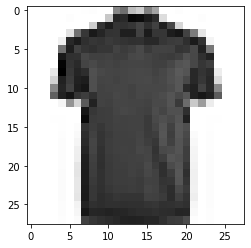

In [5]:
'''
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print(f'id = {id}')
print(f'다음 그림은 {labels[test_y[id]]} 입니다.')

plt.imshow(test_x[id], cmap='Greys')
plt.show()

### X : Min-Max Scaling

- 최소값 0, 최대값 1로 통일하는 스케일링

In [6]:
max_v, min_v = train_x.max(), train_x.min()

In [7]:
train_x = (train_x - min_v) / (max_v - min_v)
test_x = (test_x - min_v) / (max_v - min_v)

In [8]:
train_x.max(), train_x.min()

(1.0, 0.0)

### X : Reshape(# of data, 28, 28, 1)

- **끝에 1을 달아서 그레이스케일(흑백)을 명시해준다.**

In [9]:
train_x.shape

(60000, 28, 28)

In [10]:
train_x = train_x.reshape( (train_x.shape[0], train_x.shape[1], train_x.shape[2], 1) )
test_x = test_x.reshape( (test_x.shape[0], test_x.shape[1], test_x.shape[2], 1) )

In [11]:
train_x.shape, test_x.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

### Y : One-Hot Encoding

In [12]:
from tensorflow.keras.utils import to_categorical

In [13]:
class_n = len(np.unique(train_y))

In [14]:
train_y = to_categorical(train_y, class_n)
test_y = to_categorical(test_y, class_n)

In [15]:
train_x.shape, train_y.shape

((60000, 28, 28, 1), (60000, 10))

### 코드를 완성해주세요!

- **자유롭게 먼저 해보는 것을 추천**
---
- **구조를 따라서 코딩을 한다면..**

    1. 인풋 레이어
    2. Convolution : 필터수 32개, 사이즈(3, 3), same padding
    3. BatchNormalization
    4. Convolution : 필터수 32개, 사이즈(3, 3), same padding
    5. BatchNormalization
    6. MaxPooling : 사이즈(2,2) 스트라이드(2,2)
    7. DropOut : 25% 비활성화
    8. Convolution : 필터수 64개, 사이즈(3, 3), same padding
    9. BatchNormalization
    10. Convolution : 필터수 64개, 사이즈(3, 3), same padding
    11. BatchNormalization
    12. MaxPooling : 사이즈(2,2) 스트라이드(2,2)
    13. DropOut : 25% 비활성화
    14. Flatten
    15. Fully Connected Layer : 노드 512개
    16. BatchNormalization
    17. 아웃풋 레이어

In [16]:
import tensorflow as tf
from tensorflow import keras

In [17]:
## Sequential API
# 1번. 세션 클리어
keras.backend.clear_session()
# 2번. 모델 발판 생성
model = keras.models.Sequential()

# 3번. 모델 블록 조립
# 인풋 레이어
model.add( keras.layers.Input(shape=(28,28,1)) )

# Convolution : 필터수 32개, 사이즈(3, 3), same padding
model.add( keras.layers.Conv2D(filters=32,             # 새롭게 제작하려는 feature map의 수
                               kernel_size=(3,3),      # 훑는 필터의 가로 세로 사이즈
                               padding='same',         # 필터가 훑기 이전 사이즈를 유지하려는 기법
                               strides=(1,1),          # 기본적으로 한 칸씩 이동하며 훑는다
                               activation='relu') )    # 주의!!
# BatchNormalization
model.add( keras.layers.BatchNormalization() )
# Convolution : 필터수 32개, 사이즈(3, 3), same padding
model.add( keras.layers.Conv2D(filters=32,             # 새롭게 제작하려는 feature map의 수
                               kernel_size=(3,3),      # 훑는 필터의 가로 세로 사이즈
                               padding='same',         # 필터가 훑기 이전 사이즈를 유지하려는 기법
                               strides=(1,1),          # 기본적으로 한 칸씩 이동하며 훑는다
                               activation='relu') )    # 주의!!
# BatchNormalization
model.add( keras.layers.BatchNormalization() )
# MaxPooling : 사이즈(2,2) 스트라이드(2,2)
model.add( keras.layers.MaxPool2D(pool_size=(2,2),     # pooling filter의 가로 세로 사이즈
                                  strides=(2,2)) )     # pooling filter가 어떻게 이동할 것인지
# DropOut : 25% 비활성화
model.add( keras.layers.Dropout(0.25) )

# Convolution : 필터수 64개, 사이즈(3, 3), same padding
model.add( keras.layers.Conv2D(filters=64,             # 새롭게 제작하려는 feature map의 수
                               kernel_size=(3,3),      # 훑는 필터의 가로 세로 사이즈
                               padding='same',         # 필터가 훑기 이전 사이즈를 유지하려는 기법
                               strides=(1,1),          # 기본적으로 한 칸씩 이동하며 훑는다
                               activation='relu') )    # 주의!!
# BatchNormalization
model.add( keras.layers.BatchNormalization() )
# Convolution : 필터수 64개, 사이즈(3, 3), same padding
model.add( keras.layers.Conv2D(filters=64,             # 새롭게 제작하려는 feature map의 수
                               kernel_size=(3,3),      # 훑는 필터의 가로 세로 사이즈
                               padding='same',         # 필터가 훑기 이전 사이즈를 유지하려는 기법
                               strides=(1,1),          # 기본적으로 한 칸씩 이동하며 훑는다
                               activation='relu') )    # 주의!!
# BatchNormalization
model.add( keras.layers.BatchNormalization() )
# MaxPooling : 사이즈(2,2) 스트라이드(2,2)
model.add( keras.layers.MaxPool2D(pool_size=(2,2),     # pooling filter의 가로 세로 사이즈
                                  strides=(2,2)) )     # pooling filter가 어떻게 이동할 것인지
# DropOut : 25% 비활성화
model.add( keras.layers.Dropout(0.25) )

# Flatten
model.add( keras.layers.Flatten() )
# Fully Connected Layer : 노드 512개
model.add( keras.layers.Dense(512, activation='relu') )
# BatchNormalization
model.add( keras.layers.BatchNormalization() )
# 아웃풋 레이어
model.add( keras.layers.Dense(10, activation='softmax') )

# 4번. 컴파일
model.compile(loss='categorical_crossentropy', metrics=['accuracy'],
              optimizer='adam')

# 요약
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                        

### Early Stopping을 활용한 학습

- 조건
    1. validation_split = 0.2
    2. 1 epochs만 관찰해가며 속도가 가장 빠른 batch_size 찾아보기. 128개부터 시작하여 조절해볼 것.
    3. EarlyStopping. val_loss가 5 epoch 전과 비교하여 개선되지 않으면 스탑
    4. 이미지 시각화를 위해 hist 변수에 학습 과정을 넣어주세요.

In [18]:
from tensorflow.keras.callbacks import EarlyStopping

In [19]:
es = EarlyStopping(monitor='val_loss',     # Early Stopping을 적용할 대상
                   min_delta=0,            # 임계값
                   patience=5,             # 성능이 개선되지 않았을 때 몇 번이나 더 지켜볼 것인지
                   verbose=1,
                   restore_best_weights=True # 학습 후, 최적의 가중치를 가진 epoch의 가중치 적용
                   )

In [20]:
hist = model.fit(train_x, train_y, validation_split=0.2,
                 batch_size=128, epochs=10000, callbacks=[es], verbose=1)

Epoch 1/10000
375/375 [==============================] - 21s 18ms/step - loss: 0.4092 - accuracy: 0.8539 - val_loss: 1.5088 - val_accuracy: 0.4964
Epoch 2/10000
375/375 [==============================] - 6s 17ms/step - loss: 0.2732 - accuracy: 0.9012 - val_loss: 0.3393 - val_accuracy: 0.8734
Epoch 3/10000
375/375 [==============================] - 6s 17ms/step - loss: 0.2338 - accuracy: 0.9147 - val_loss: 0.2283 - val_accuracy: 0.9180
Epoch 4/10000
375/375 [==============================] - 6s 16ms/step - loss: 0.2073 - accuracy: 0.9230 - val_loss: 0.2257 - val_accuracy: 0.9161
Epoch 5/10000
375/375 [==============================] - 6s 16ms/step - loss: 0.1867 - accuracy: 0.9311 - val_loss: 0.2140 - val_accuracy: 0.9232
Epoch 6/10000
375/375 [==============================] - 6s 16ms/step - loss: 0.1712 - accuracy: 0.9370 - val_loss: 0.2065 - val_accuracy: 0.9242
Epoch 7/10000
375/375 [==============================] - 6s 17ms/step - loss: 0.1536 - accuracy: 0.9423 - val_loss: 0.2003 

### 이미지 시각화

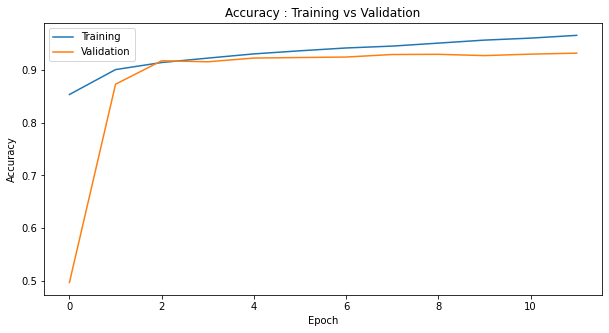

In [21]:
plt.figure(figsize=(10, 5))
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy : Training vs Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

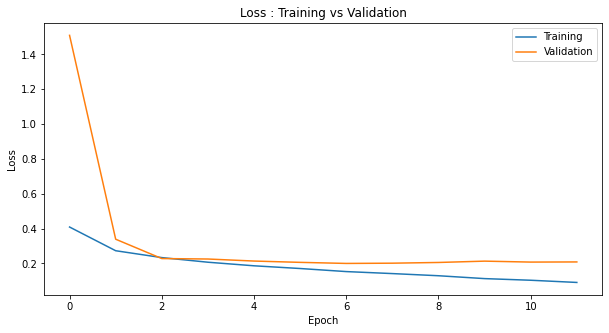

In [22]:
plt.figure(figsize=(10, 5))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss : Training vs Validation')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc=0)
plt.show()

In [23]:
y_pred = model.predict(test_x)
y_pred.shape

313/313 [==============================] - 1s 4ms/step


(10000, 10)

In [24]:
single_y_pred = y_pred.argmax(axis=1)
single_y_pred.shape

(10000,)

In [25]:
single_y_pred[:3]

array([9, 2, 1])

In [26]:
print(test_y.shape)
single_test_y = test_y.argmax(axis=1)
print(single_test_y.shape)

(10000, 10)
(10000,)


In [27]:
test_acc = accuracy_score(single_test_y, single_y_pred)

print(f'테스트셋 정확도 : {test_acc*100:.2f}%' )

테스트셋 정확도 : 92.33%


id = 3603
다음 그림은 숫자 5 입니다.
모델의 예측 : 5
모델의 카테고리별 확률 : [ 0.  0.  0.  0.  0. 99.  0.  0.  0.  0.]
정답입니다


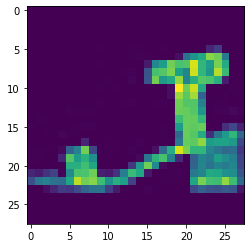

In [33]:
'''
성능 확인을 위해
Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

id = rd.randrange(0,10000)

print(f'id = {id}')
print(f'다음 그림은 숫자 {single_test_y[id]} 입니다.')
print(f'모델의 예측 : {single_y_pred[id]}')
print(f'모델의 카테고리별 확률 : {np.floor(y_pred[id]*100)}')

if single_test_y[id] == single_y_pred[id] :
    print('정답입니다')
else : 
    print('틀렸어요')
    
plt.imshow(test_x[id].reshape([28,-1]))
plt.show()

id = 3639
다음 그림은 숫자 4 입니다.
모델의 예측 : 3
모델의 카테고리별 확률 : [ 0.  0.  0. 86. 12.  0.  0.  0.  0.  0.]
틀렸어요


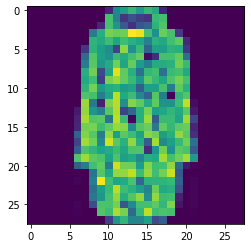

In [41]:
'''
틀린 것만 관찰해보자!

Ctrl+Enter를 이용하여
반복 실행 해보자!
'''

true_false = (single_test_y==single_y_pred)
f_id = np.where(true_false==False)[0]        # 틀린 것들의 인덱스 반환
f_n = len(f_id)                              # 틀린 것들이 총 몇 개나 될까?

id = f_id[rd.randrange(0,f_n)]

print(f'id = {id}')
print(f'다음 그림은 숫자 {single_test_y[id]} 입니다.')
print(f'모델의 예측 : {single_y_pred[id]}')
print(f'모델의 카테고리별 확률 : {np.floor(y_pred[id]*100)}')

if single_test_y[id] == single_y_pred[id] :
    print('정답입니다')
else : 
    print('틀렸어요')
    
plt.imshow(test_x[id].reshape([28,-1]))
plt.show()